# Data-Level Unit PSTH Plot

## Imports

In [1]:
%pylab --no-import-all
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
import datajoint as dj

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pipeline import experiment
from pipeline import ephys
from pipeline import psth
from pipeline import plot

Connecting chris@localhost:3306


## Unit Selection

Details are explained in the `unit_psth_quick_plot` notebook.

In [3]:
my_session = {'subject_id': 435884, 'session':1}
my_unit = {**my_session, 'unit': 4}

## Select PSTH Conditions

In [5]:
psth.TrialCondition()

condition_id,condition_desc
0,audio delay contra hit
1,audio delay ipsi hit
2,audio delay contra error
3,audio delay ipsi error


In [6]:
ipsi_hit_cond_key = (psth.TrialCondition() & {'condition_desc': 'audio delay ipsi hit'}).fetch1('KEY')
contra_hit_cond_key = (psth.TrialCondition() & {'condition_desc': 'audio delay contra hit'}).fetch1('KEY')

ipsi_err_cond_key = (psth.TrialCondition() & {'condition_desc': 'audio delay ipsi error'}).fetch1('KEY')
contra_err_cond_key = (psth.TrialCondition() & {'condition_desc': 'audio delay contra error'}).fetch1('KEY')

### Verify Computed PSTH Availability

In [7]:
psth.UnitPsth & {**ipsi_hit_cond_key, **my_unit}

condition_id,subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_psth
1,435884,1,1,4,=BLOB=


## Fetch PSTH Data

### CellPsth.get Method

To save repeated queries for psth, trials, and spikes, a 'get' utility method is available in the psth.CellPsth DataJoint class.

This method uses the user-defined `psth.Condition` objects to find trials related to the condition, and fetches associated trial numbers, spike data and precomputed psth data. Code is as folows:

In [8]:
plot.show_source(psth.UnitPsth.get)

## Fetch CellPsth Data

In [9]:
ipsi_hit_unit_psth = psth.UnitPsth.get(ipsi_hit_cond_key, my_unit)
contra_hit_unit_psth = psth.UnitPsth.get(contra_hit_cond_key, my_unit)

ipsi_err_unit_psth = psth.UnitPsth.get(ipsi_hit_cond_key, my_unit)
contra_err_unit_psth = psth.UnitPsth.get(contra_err_cond_key, my_unit)
psths = [ipsi_hit_unit_psth, contra_hit_unit_psth, ipsi_err_unit_psth, contra_err_unit_psth]

In [10]:
list(ipsi_hit_unit_psth.keys())

['trials', 'spikes', 'psth', 'raster']

In [11]:
[len(x['psth'][0]) for x in psths]

[149, 149, 149, 149]

## Plot PSTH Data

The `unit_psth_ll` function performs a plot given a set of input data in 'get' format

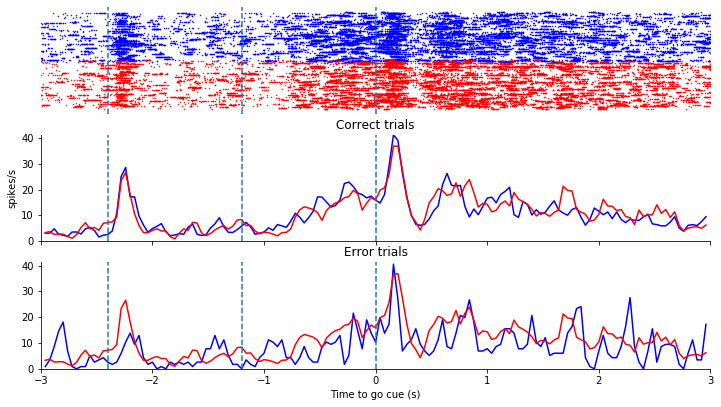

In [15]:
plot.unit_psth_ll(*psths)

## Plotting Code

In [16]:
plot.show_source(plot.unit_psth_ll)